In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import os
import math

In [18]:
# 
state_results = pd.read_csv('data_tables/state_results.csv')
# state_results = dataframes['state_results']
state_results['Release Period'] = pd.to_datetime(state_results['Release Period'].str.lstrip('07_'))
state_results.columns = state_results.columns.str.lower().str.replace(' ', '_')
state_results['nps'] = state_results['top-box_percentage'] - state_results['bottom-box_percentage']
state_results.head()

,release_period,state,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,nps
0,2015-01-01,AK,H_CLEAN_HSP,8,22,70,62
1,2015-01-01,AK,H_COMP_1,9,17,74,65
2,2015-01-01,AK,H_COMP_2,10,15,75,65
3,2015-01-01,AK,H_COMP_3,11,21,68,57
4,2015-01-01,AK,H_COMP_5,19,17,64,45


C:\Users\Andy\AppData\Local\Temp\ipykernel_23996\3279935556.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


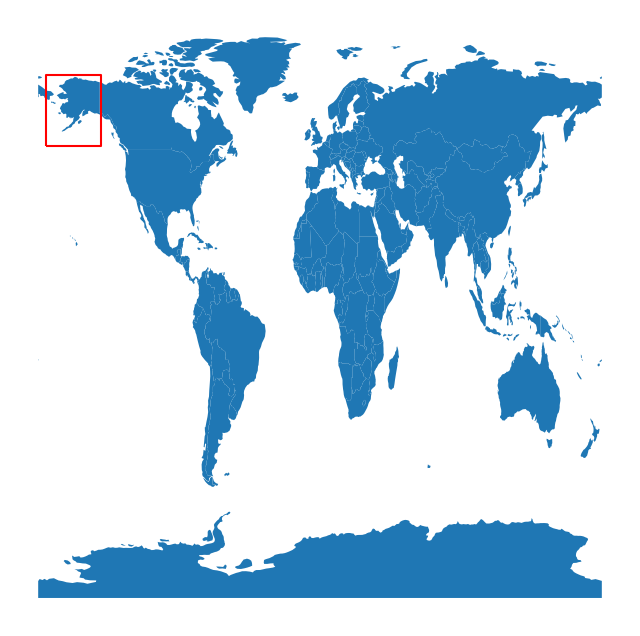

In [11]:
gdf = gpd.read_file('shapefiles\cb_2022_us_state_20m.shp')
df = pd.read_csv('data_tables\state_results.csv')
gdf = gdf.merge(df,left_on='STUSPS',right_on='State')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
hipolygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_axis_off()
plt.show()

<Axes: >

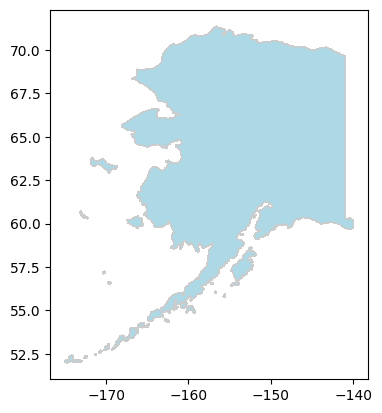

In [13]:
alaska_gdf = gdf[gdf['State']=='AK']

alaska_gdf.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')


<Axes: >

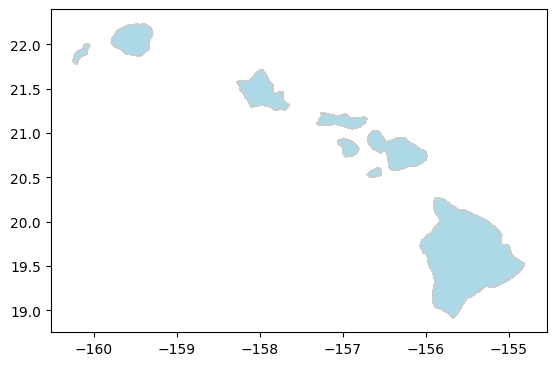

In [14]:
hawaii_gdf = gdf[gdf['State']=='HI']
hipolygon = Polygon([(-161,0),(-161,90),(-120,90),(-120,0)])
hawaii_gdf.clip(hipolygon).plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: 'GeoDataFrame' object has no attribute 'value_determined_color'

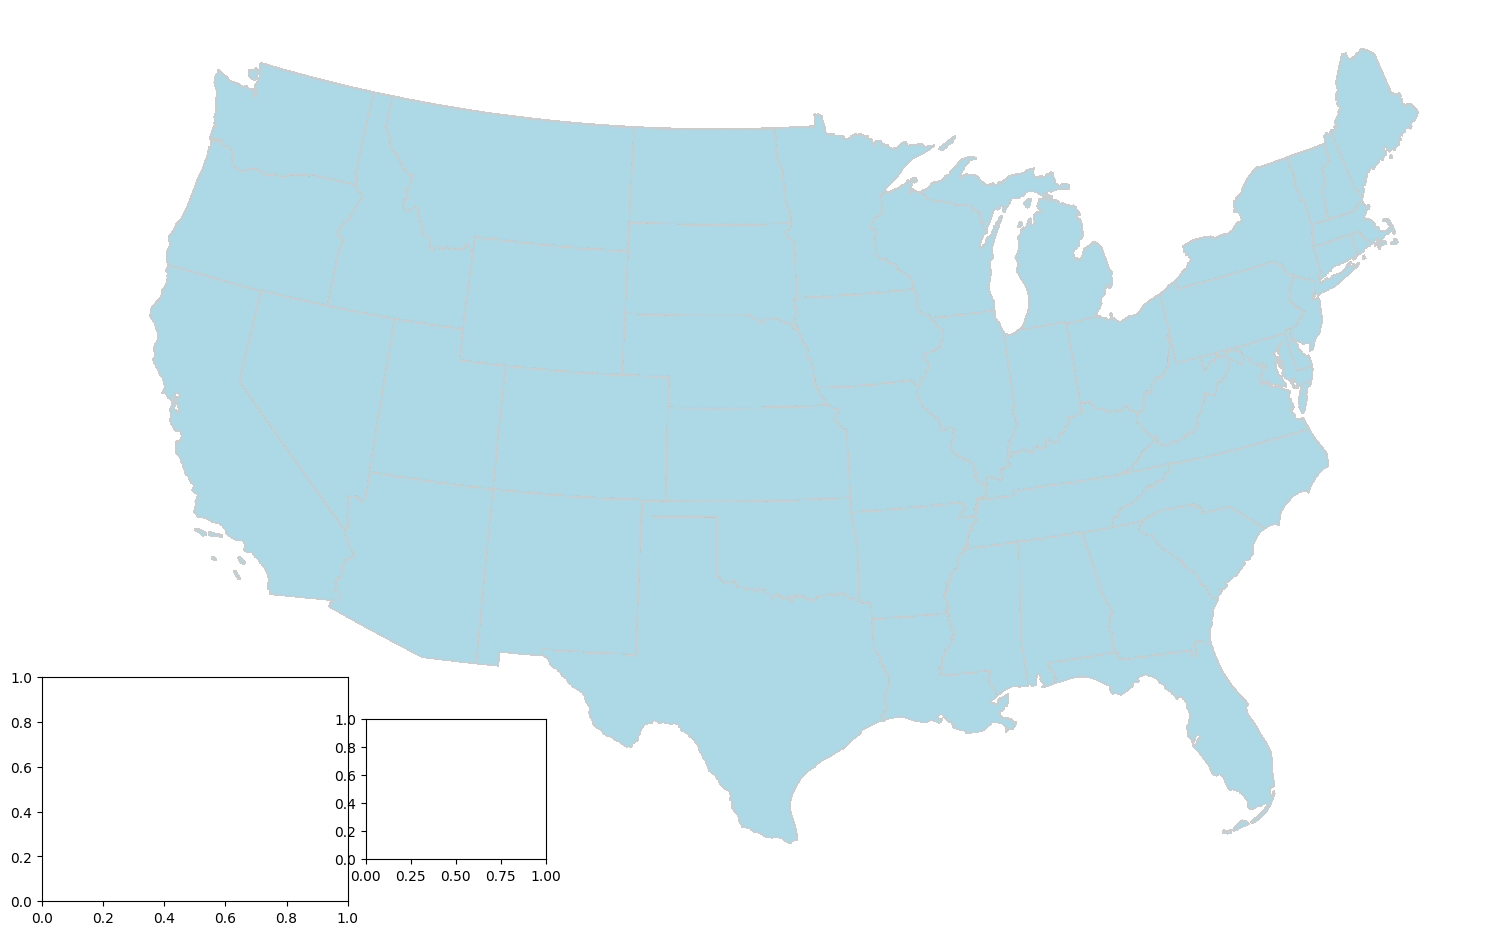

In [22]:
# Create a "copy" of gdf for re-projecting
usmap = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')


# create map of all states except AK and HI in the main map axis
usmap[~usmap['State'].isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   

# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   

akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf['State']=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf['State']=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf['State']=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')


In [20]:
gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",07_2015,TX,H_CLEAN_HSP,8,17,75
1,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",07_2015,TX,H_COMP_1,4,16,80
2,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",07_2015,TX,H_COMP_2,4,12,84
3,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",07_2015,TX,H_COMP_3,9,21,70
4,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",07_2015,TX,H_COMP_5,17,16,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,50,01779802,0400000US50,50,VT,Vermont,00,23872569964,1030754610,"POLYGON ((-73.41632 44.09942, -73.39540 44.166...",07_2023,VT,H_COMP_6,12,0,88
4576,50,01779802,0400000US50,50,VT,Vermont,00,23872569964,1030754610,"POLYGON ((-73.41632 44.09942, -73.39540 44.166...",07_2023,VT,H_COMP_7,5,42,53
4577,50,01779802,0400000US50,50,VT,Vermont,00,23872569964,1030754610,"POLYGON ((-73.41632 44.09942, -73.39540 44.166...",07_2023,VT,H_HSP_RATING,8,21,71
4578,50,01779802,0400000US50,50,VT,Vermont,00,23872569964,1030754610,"POLYGON ((-73.41632 44.09942, -73.39540 44.166...",07_2023,VT,H_QUIET_HSP,12,35,53


c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: 'Pandas' object has no attribute 'state'

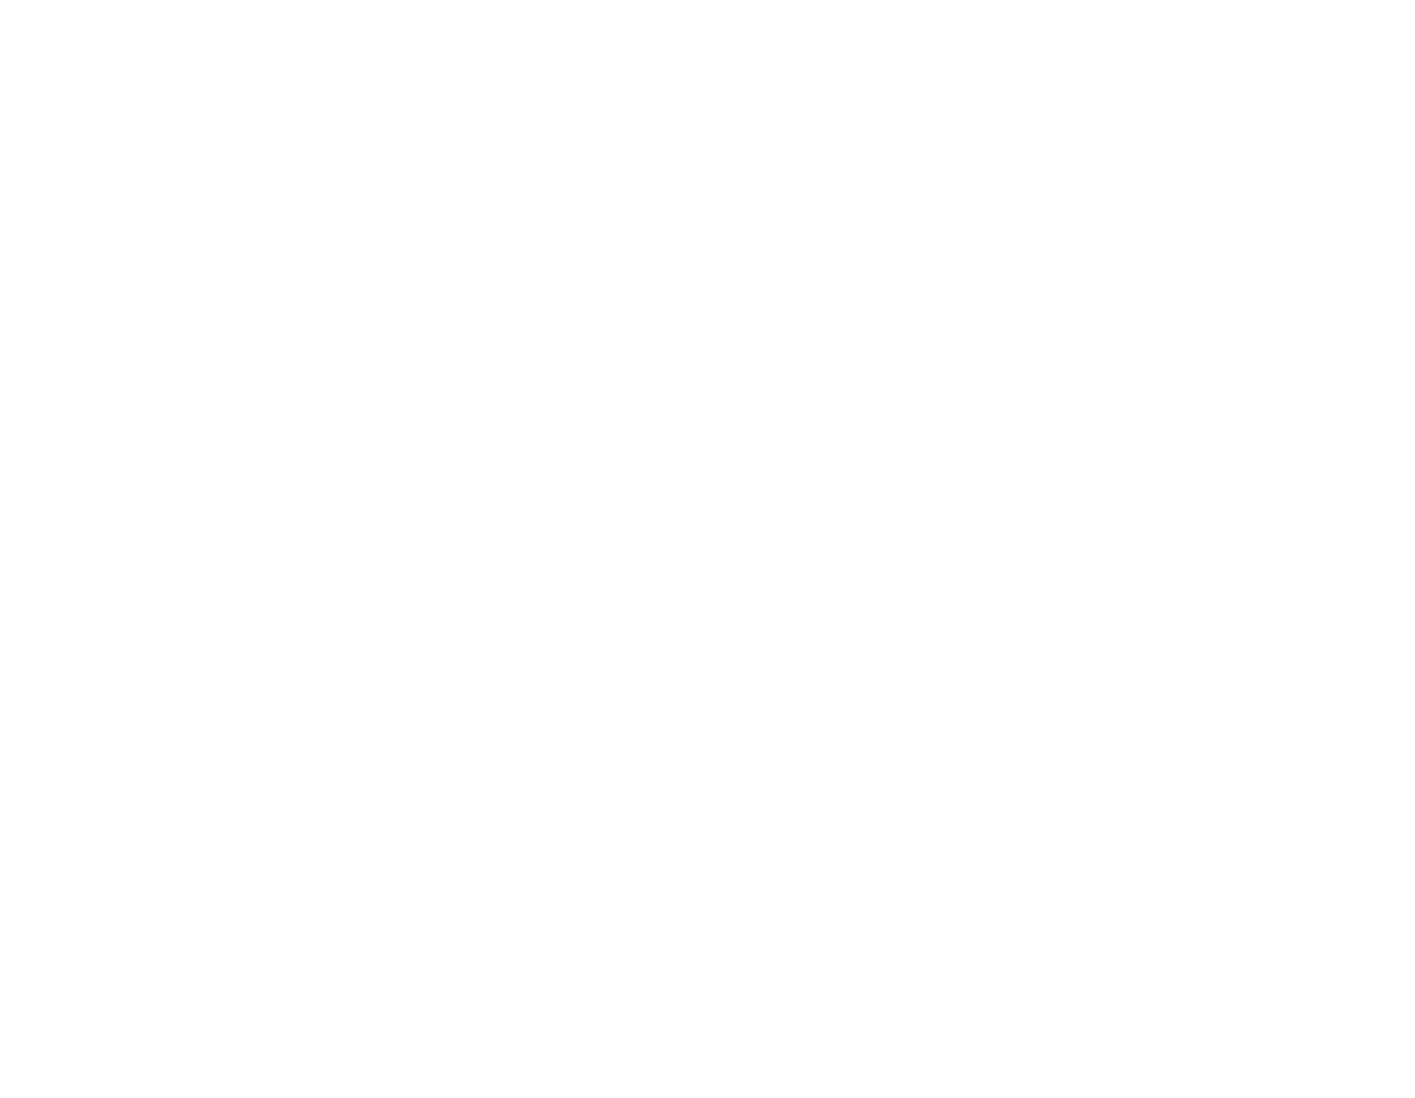

In [19]:
# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
variable = state_results.nps
# create "visframe" as a re-projected gdf using EPSG 2163
usmap = gdf.to_crs({'init':'epsg:2163'})



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')
for row in usmap.itertuples():
    if row.state not in ['AK','HI']:
        vf = usmap[usmap.state==row.state]
        c = gdf[gdf.state==row.state][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.state=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf.state=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.state=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')

